In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from wrangle import wrangled_zillow

In [5]:
train, validate, test = wrangled_zillow()

Using cached csv


In [6]:
train.columns

Index(['bedrooms', 'bathrooms', 'area', 'tax_value', 'year_built', 'county',
       'tax_amount', 'transaction_date'],
      dtype='object')

- Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

In [7]:
columns_to_scale = ['bedrooms', 'bathrooms', 'area', 'tax_value']

In [8]:
#create variable and set to train copy so original data remains untouched
train_scaled = train.copy()

In [9]:
scaler = MinMaxScaler()

In [12]:
#fit_transform scaler to train data 
train_scaled[columns_to_scale] = scaler.fit_transform(train[columns_to_scale])

In [13]:
train_scaled.head()

,bedrooms,bathrooms,area,tax_value,year_built,county,tax_amount,transaction_date
14961,0.333333,0.500000,0.466430,0.738723,1985,OC,8973.00,2017-03-31
33917,0.666667,0.333333,0.549709,0.063374,1956,OC,1085.74,2017-06-23
29530,0.333333,0.333333,0.455778,0.513148,1940,LA,6824.84,2017-06-06
37330,0.000000,0.000000,0.348612,0.341996,1947,LA,5398.68,2017-07-07
26232,0.666667,0.666667,0.505487,0.593078,2005,VC,7520.44,2017-05-23


In [14]:
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,county,tax_amount,transaction_date
14961,3.0,2.5,1913.0,830000.0,1985,OC,8973.00,2017-03-31
33917,4.0,2.0,2171.0,74179.0,1956,OC,1085.74,2017-06-23
29530,3.0,2.0,1880.0,577546.0,1940,LA,6824.84,2017-06-06
37330,2.0,1.0,1548.0,386000.0,1947,LA,5398.68,2017-07-07
26232,4.0,3.0,2034.0,667000.0,2005,VC,7520.44,2017-05-23


Text(0, 0.5, 'Count')

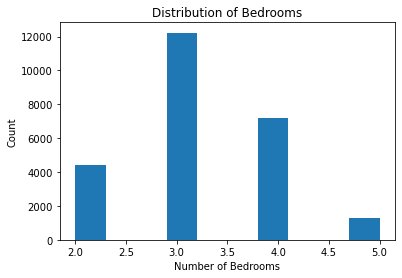

In [15]:
plt.hist(train.bedrooms)
plt.title('Distribution of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

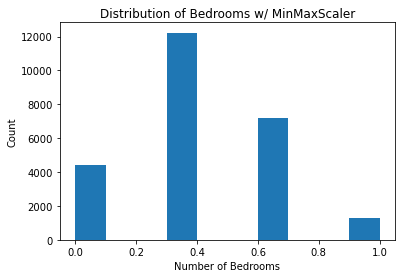

In [16]:
plt.hist(train_scaled.bedrooms)
plt.title('Distribution of Bedrooms w/ MinMaxScaler')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')

In [24]:
#from review

def visualize_scaler(scaler, df, columns_to_scale, bins = 10):
    fig, axs = plt.subplots(len(columns_to_scale), 2, figsize = (16,9))
    df_scaled = df.copy()
    df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
    
    for (ax1, ax2), col in zip(axs, columns_to_scale):
        ax1.hist(df[col], bins = bins)
        ax1.set(title = f'{col} before scaling', xlabel = col, ylabel = 'count')
        ax2.hist(df_scaled[col], bins = bins)
        ax2.set(title = f'{col} after scaling with {scaler.__class__.__name__}', xlabel = col, ylabel = 'count')
        
    plt.tight_layout()

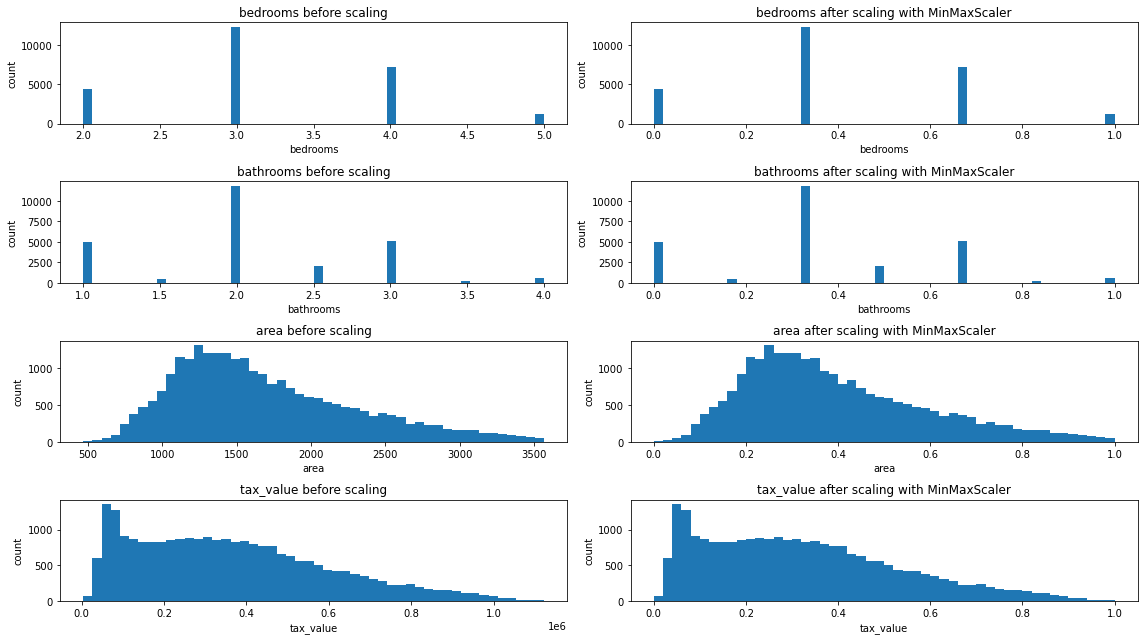

In [25]:
# MinMaxScaler applied

visualize_scaler(scaler = MinMaxScaler(), df = train, columns_to_scale = columns_to_scale, bins = 50)

#### StandardScaler

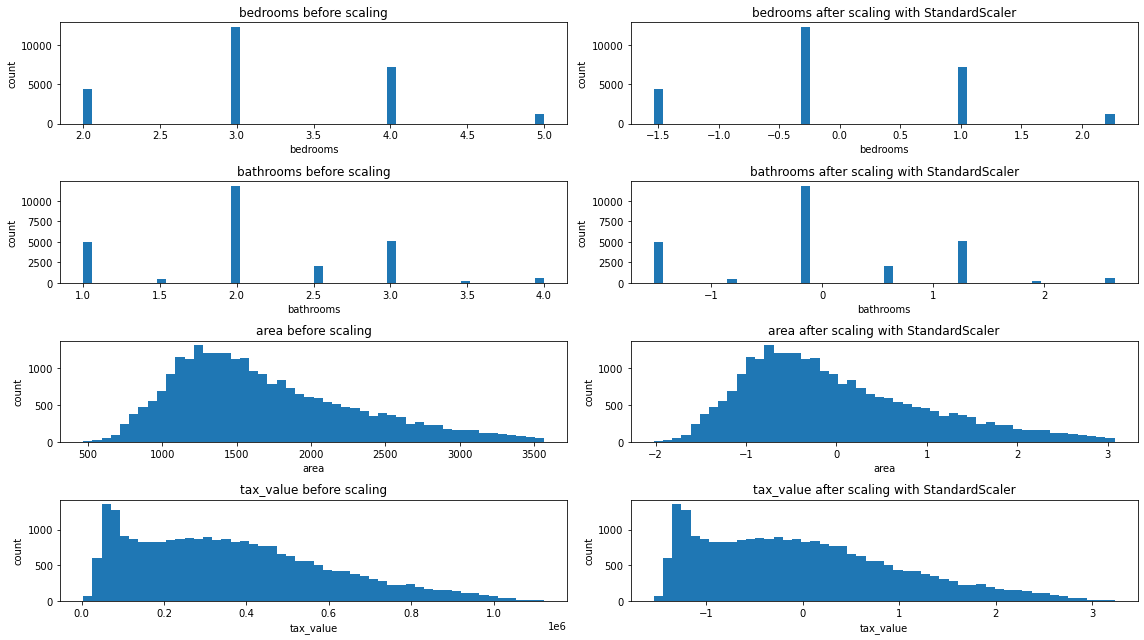

In [26]:
visualize_scaler(scaler = StandardScaler(), df = train, columns_to_scale = columns_to_scale, bins = 50)

#### RobustScaler

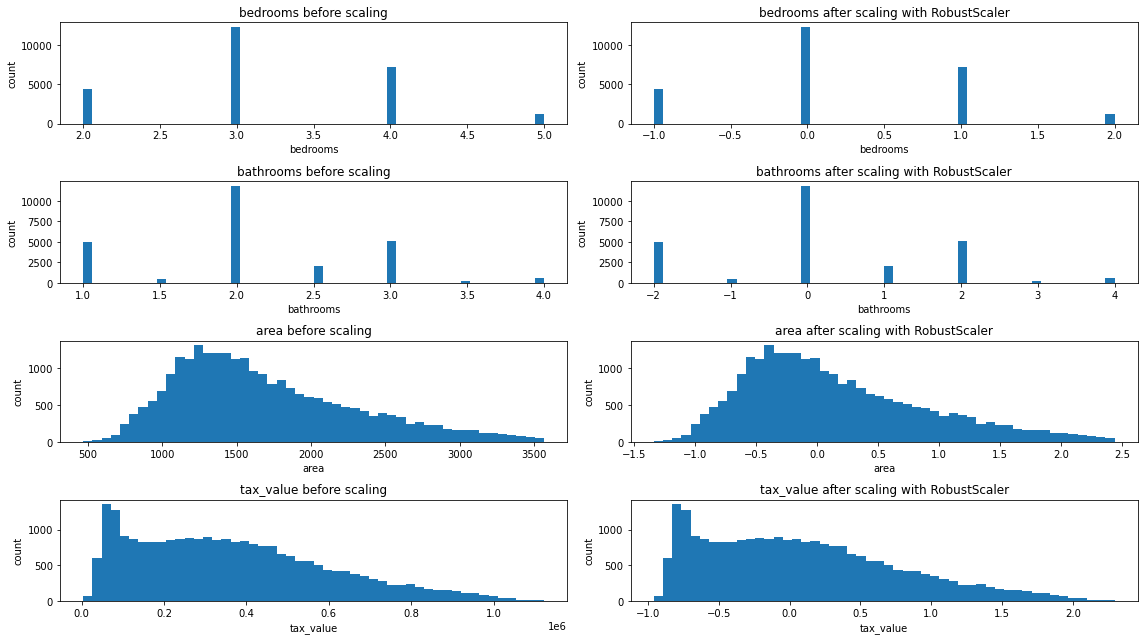

In [28]:
visualize_scaler(scaler = RobustScaler(), df = train, columns_to_scale = columns_to_scale, bins = 50)

- Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

    - Yes, same as original data

In [29]:
scaler = MinMaxScaler()
original_data = train[['tax_amount']]
scaled_data = scaler.fit_transform(original_data)

In [30]:
scaled_data[:5]

array([[0.74294896],
       [0.08629838],
       [0.56410478],
       [0.44537042],
       [0.62201668]])

In [31]:
original_data[:5]

,tax_amount
14961,8973.00
33917,1085.74
29530,6824.84
37330,5398.68
26232,7520.44


In [33]:
scaler.inverse_transform(scaled_data)[:5]

array([[8973.  ],
       [1085.74],
       [6824.84],
       [5398.68],
       [7520.44]])

In [34]:
#where it shows false, rounding error
(scaler.inverse_transform(scaled_data) == original_data) 

,tax_amount
14961,True
33917,True
29530,False
37330,True
26232,False
...,...
10735,True
36170,False
16109,True
26084,True


- Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

#### Quantile Transformer

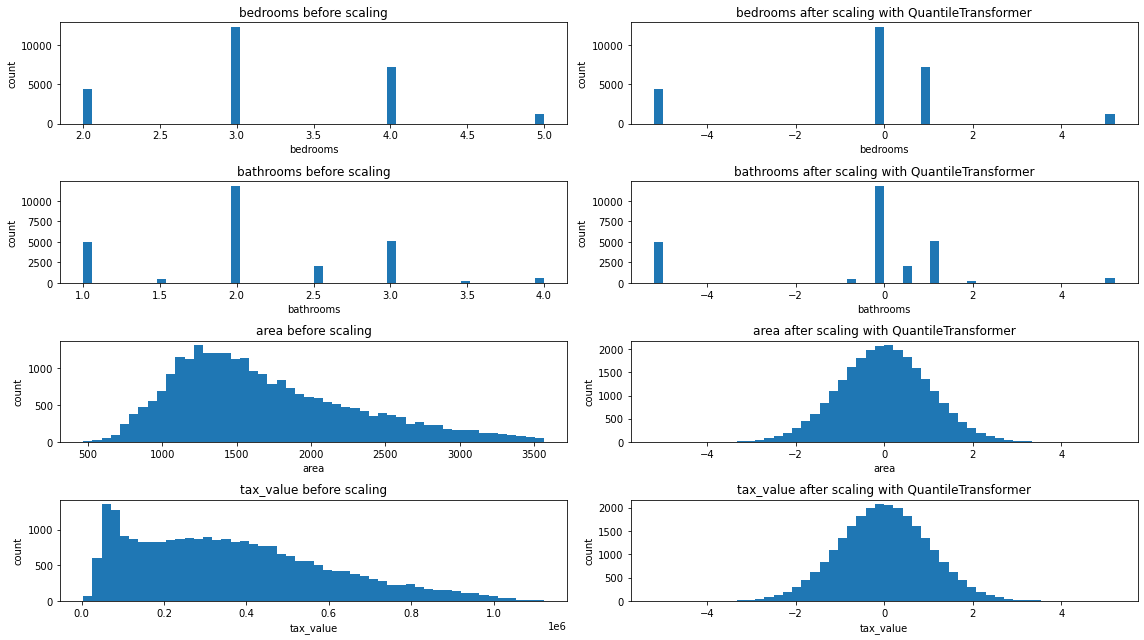

In [36]:
visualize_scaler(scaler = QuantileTransformer(output_distribution = 'normal'), 
                    df = train, columns_to_scale = columns_to_scale, bins = 50 )

- Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?
    - distribution isn't normalized into a bell curve

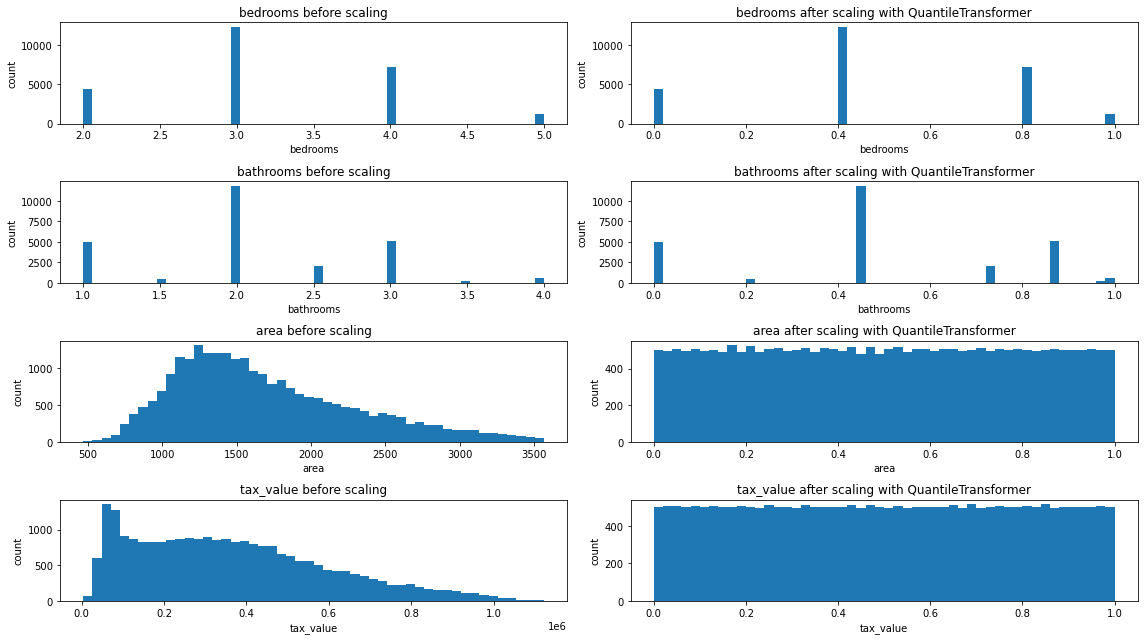

In [37]:
visualize_scaler(scaler = QuantileTransformer(), 
                    df = train, columns_to_scale = columns_to_scale, bins = 50 )

- Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [38]:
def scale_data(train, 
               validate, 
               test, 
               columns_to_scale=['bedrooms', 'bathrooms', 'tax_value', 'area'],
               return_scaler=False):
    '''
    Scales the 3 data splits. 
    Takes in train, validate, and test data splits and returns their scaled counterparts.
    If return_scalar is True, the scaler object will be returned as well
    '''
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    
    scaler = MinMaxScaler()
    scaler.fit(train[columns_to_scale])
    
    train_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(train[columns_to_scale]),
                                                  columns = train[columns_to_scale].columns.values).set_index([train.index.values])
                                                  
    validate_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(validate[columns_to_scale]),
                                                  columns = validate[columns_to_scale].columns.values).set_index([validate.index.values])
    
    test_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(test[columns_to_scale]),
                                                 columns=test[columns_to_scale].columns.values).set_index([test.index.values])
    
    if return_scaler:
        return scaler, train_scaled, validate_scaled, test_scaled
    
    else:
        return train_scaled, validate_scaled, test_scaled


In [39]:
#example of pipeline function being called

scaler, train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test, return_scaler = True)

In [40]:
train_scaled.head()

,bedrooms,bathrooms,area,tax_value,year_built,county,tax_amount,transaction_date
14961,0.333333,0.500000,0.466430,0.738723,1985,OC,8973.00,2017-03-31
33917,0.666667,0.333333,0.549709,0.063374,1956,OC,1085.74,2017-06-23
29530,0.333333,0.333333,0.455778,0.513148,1940,LA,6824.84,2017-06-06
37330,0.000000,0.000000,0.348612,0.341996,1947,LA,5398.68,2017-07-07
26232,0.666667,0.666667,0.505487,0.593078,2005,VC,7520.44,2017-05-23


In [41]:
validate_scaled.head()

,bedrooms,bathrooms,area,tax_value,year_built,county,tax_amount,transaction_date
32344,1.000000,0.666667,0.587799,0.337745,1971,LA,5343.15,2017-06-19
15360,0.000000,0.166667,0.158812,0.141714,1964,OC,2010.52,2017-04-03
37113,0.333333,0.000000,0.242737,0.466196,1950,LA,6382.61,2017-07-07
38511,0.000000,0.000000,0.125888,0.150130,1939,LA,2196.87,2017-07-13
5970,0.666667,0.500000,0.707553,0.944784,1967,OC,11496.12,2017-02-09


In [42]:
test_scaled.head()

,bedrooms,bathrooms,area,tax_value,year_built,county,tax_amount,transaction_date
27857,0.333333,0.333333,0.228535,0.047752,1979,LA,870.25,2017-05-31
17303,0.666667,0.666667,0.448999,0.676644,1974,LA,11767.77,2017-04-12
15964,0.666667,0.666667,0.622337,0.600200,1985,OC,8027.20,2017-04-05
3959,0.333333,0.333333,0.164622,0.206068,1924,LA,2882.27,2017-01-27
20471,0.333333,0.333333,0.221110,0.399182,1953,LA,2387.06,2017-04-27
